<center>
  <h1>Fetal Health Classification</h1>
  <img src="https://blog.pregistry.com/wp-content/uploads/2018/08/AdobeStock_90496738.jpeg">
  <small>Source: Google</small>
</center>

  <p>
  Fetal mortality refers to stillbirths or fetal death. It encompasses any death of a fetus after 20 weeks of gestation.

  Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality.
  
  Cardiotocography is a technical means of recording the fetal heartbeat and the uterine contractions during pregnancy. It is most commonly used in the third trimester and its purpose is to monitor fetal well-being and allow early detection of fetal distress. An abnormal CTG may indicate the need for further investigations and potential intervention.
  </p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../input/fetal-health-classification/fetal_health.csv')

| Variable symbol |	Variable description|
| ----------------|---------------------|
|LB	| Fetal heart rate baseline (beats per minute)|
|AC	| Number of accelerations per second|
|FM	| Number of fetal movements per second|
|UC	| Number of uterine contractions per second|
|DL	| Number of light decelerations per second|
|DS	| Number of severe decelerations per second|
|DP	| Number of prolonged decelerations per second|
|ASTV	| Percentage of time with abnormal short-term variability|
|MSTV	| Mean value of short-term variability|
|ALTV	| Percentage of time with abnormal long-term variability|
|MLTV	| Mean value of long-term variability|
|Width	| Width of FHR histogram|
|Min	| Minimum of FHR histogram|
|Max	| Maximum of FHR histogram|
|Nmax	| Number of histogram peaks|
|Nzeros	| Number of histogram zeroes|
|Mode	| Histogram mode|
|Median	| Histogram median|
|Variance	| Histogram variance|
|Tendency |	Histogram tendency|
|NSP	| Fetal state class code (N=Normal, S=Suspected,P=Pathological)|


Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

Thankfully, there are no NaN values in the dataset.

In [ ]:
sns.countplot(x='fetal_health', data=df)
print(df['fetal_health'].value_counts())

We can see that there is the problem of class imbalance in this dataset. This means we cannot use **accuracy** as a metric to evaluate the performance of our model. The most appropiate metric for model evaluation can be:
1. F1 Score
2. Recall
3. Precision

Before diving deep into understanding the data and features, let us first look at what does the three different categories of fetal_health represent. Please refer to the table below for the same.

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4812878/

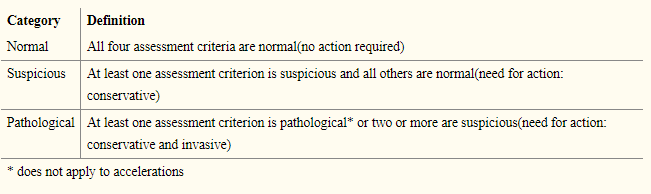

In [ ]:
for i, column in enumerate(df.columns):
    sns.boxplot(x='fetal_health', y=column, data=df)
    plt.title(column)
    plt.show()
    print()

In [ ]:
corr = df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

From the above correlation matrix, we can observe that the following features show some correlation with target variable fetal health:

1. accelerations (negative corr)
2. uterine contractions (negative corr)
3. prolonged_decelerations (positive corr)
4. abnormal short term variability (positive corr)
5. percentage of time with abnormal long term variability (positive corr)



In [ ]:
sns.jointplot(x="accelerations", y="uterine_contractions", data=df, hue="fetal_health")

In [ ]:
sns.jointplot(x="prolongued_decelerations", y="uterine_contractions", data=df, hue="fetal_health")

While for uterine_contractions, there is no clear pattern that can be observed for determining the fetal health, we can see that "prolongued decelerations" somewhat show a pattern indicating that high value of prolongued_decelarations increases the chances of fetus not being healthy.

> Decelerations are an abrupt decrease in the baseline fetal heart rate of greater than 15 bpm for greater than 15 seconds. A prolonged deceleration is defined as a deceleration that lasts more than 3 minutes

Let us see if my hypothesis regarding the "prolongued_decelarations" is correct with the help of density plots.

In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(df, x="prolongued_decelerations", hue="fetal_health", kind="kde", fill=True)
plt.show()

In [ ]:
eda = df[df['fetal_health']!=1.0]
plt.figure(figsize=(25, 25))
sns.displot(eda, x="prolongued_decelerations", hue="fetal_health", kind="kde", fill=True)
plt.show()

In [ ]:
eda_normal = df[df['fetal_health']==1.0]
plt.figure(figsize=(25, 25))
sns.displot(eda_normal, x="prolongued_decelerations", hue="fetal_health", kind="kde", fill=True)
plt.show()

With the above density plots, my hypothesis has been proved correct to a great extent.

In [ ]:
sns.jointplot(x="accelerations", y="abnormal_short_term_variability", data=df, hue="fetal_health")

In [ ]:
sns.jointplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", data=df, hue="fetal_health")

In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(df, x="percentage_of_time_with_abnormal_long_term_variability", hue="fetal_health", kind="kde", fill=True)
plt.show()

In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(eda, x="percentage_of_time_with_abnormal_long_term_variability", hue="fetal_health", kind="kde", fill=True)
plt.show()

In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(eda_normal, x="percentage_of_time_with_abnormal_long_term_variability", hue="fetal_health", kind="kde", fill=True)
plt.show()

From the above density plots, we can observe that the fetuses with normal health do not show abnormal_long_term_variability for very long span of time i.e. only ±5%. However, the fetuses which are not healthy show abnormal_long_term_variability during majority of pregnancy. 


> Long-term variability represents broad-based swings in fetal heart rate, or "waviness".



In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(df, x="abnormal_short_term_variability", hue="fetal_health", kind="kde", fill=True)
plt.show()

The fetuses with high abnormal_short_term_variability value are classified as "suspicious" or "pathological" but abnormal_short_term_variability alone cannot be an indicator of fetus health as "normal" fetuses can have high abnormal_short_term_variability value as well. 

> Short term variability means that from one moment to the next, the fetal heart speeds up slightly and then slows down slightly, usually with a range of 3-5 BPM from the baseline. The normal fetal heart rate baseline is from 120 to 160 BPM

In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(df, x="accelerations", hue="fetal_health", kind="kde", fill=True)
plt.show()

There is no clear pattern that can be observed for the feature "accelerations".

## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score

In [ ]:
print("There are total "+str(len(df))+" rows in the dataset")

In [ ]:
X = df.drop(["fetal_health"],axis=1)
Y = df["fetal_health"]

In [ ]:
std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X_sc, Y, test_size=0.25, random_state=42)
print("There are total "+str(len(X_train))+" rows in training dataset")
print("There are total "+str(len(X_test))+" rows in test dataset")

If you remember, in the initial investigation of the data, we found out that we have imbalanced classes. 

To handle the problem of imbalanced classes, we can use oversampling techniques. In oversampling, we populate the minority classes with some synthetic data. 

Let us try some oversampling techniques and judge their performance on the above dataset.

1. SMOTE Technique

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

2. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

3. SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

4. SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

In [ ]:
def evaluate_model(clf, X_test, y_test, model_name, oversample_type):
  print('--------------------------------------------')
  print('Model ', model_name)
  print('Data Type ', oversample_type)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  print(classification_report(y_test, y_pred))
  print("F1 Score ", f1)
  print("Recall ", recall)
  print("Precision ", precision)
  return [model_name, oversample_type, f1, recall, precision]

In [ ]:
models = {
    'DecisionTrees': DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'LinearSVC':LinearSVC(random_state=0),
    'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
    'SGD':SGDClassifier()
}

In [ ]:
oversampled_data = {
    'ACTUAL':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm],
    'ADASYN':[X_train_ada, y_train_ada],
    'SMOTE_TOMEK':[X_train_smtom, y_train_smtom],
    'SMOTE_ENN':[X_train_smenn, y_train_smenn]
}

In [ ]:
final_output = []
for model_k, model_clf in models.items():
  for data_type, data in oversampled_data.items():
    model_clf.fit(data[0], data[1])
    final_output.append(evaluate_model(model_clf, X_test, y_test, model_k, data_type))

In [ ]:
final_df = pd.DataFrame(final_output, columns=['Model', 'DataType', 'F1', 'Recall', 'Precision'])

In [ ]:
final_df.sort_values(by="F1", ascending=False)

### Hyperparameter Tuning

In [ ]:
param_grid = {
  'criterion':['gini', 'entropy'],
  'max_depth': [10, 20, 40, 80, 100],
  'max_features': ['auto', 'sqrt'],
  'n_estimators': [200, 400, 600, 800, 1000, 2000]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=2)
rfc_cv.fit(X_train_ada, y_train_ada)

In [ ]:
params = rfc_cv.best_params_
print(params)

In [ ]:
rf = RandomForestClassifier(n_estimators=params['n_estimators'], criterion=params['criterion'], max_depth=params['max_depth'], max_features=params['max_features'])
rf.fit(X_train_ada, y_train_ada)
evaluate_model(rf, X_test, y_test, 'RandomForest', 'ADASYN')